## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
meta_results = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
# Display the data table for preview
meta_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
meta_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
meta_results['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
meta_results[meta_results.duplicated(keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
cond = meta_results["Mouse ID"] == "g989"
meta_results.loc[cond]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mr_clean = pd.DataFrame
cond2 = meta_results["Mouse ID"] != "g989"
mr_clean = meta_results.loc[cond2].reset_index(drop=True)
mr_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
mr_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [8]:
mr_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
reg_group = mr_clean.groupby('Drug Regimen')['Tumor Volume (mm3)']
grp = reg_group.mean()
grp


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



reg_summ = mr_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"]
reg_mean = reg_summ.mean()
reg_med = reg_summ.median()
reg_var = reg_summ.var()
reg_std = reg_summ.std()
reg_sem = reg_summ.sem()

summ1 = pd.concat([reg_mean, reg_med, reg_var, reg_std, reg_sem], axis=1)
summ1.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance",
                "Tumor Volume STDV", "Tumor Volume SEM"]
summ1


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STDV,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line



summ2 = mr_clean.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)":["mean", "median",'var', "std", "sem"]})
summ2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
mr_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
grp = mr_clean.groupby('Drug Regimen')

grp1 = grp['Drug Regimen'].count()
grp1

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

In [14]:
grp1_summ = pd.DataFrame
grp1_summ = mr_clean['Drug Regimen'].value_counts().reset_index()
grp1_summ.columns = ['Drug', 'Number of Timepoints']
grp1_summ

,Drug,Number of Timepoints
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


<function matplotlib.pyplot.show(close=None, block=None)>

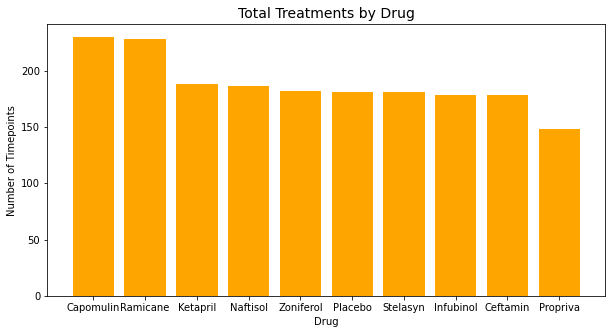

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot


plt.figure(figsize=(10,5))
plt.bar(grp1_summ['Drug'], grp1_summ['Number of Timepoints'], color="orange")

plt.xlabel("Drug")
plt.ylabel("Number of Timepoints")
plt.title("Total Treatments by Drug", fontsize=14)
plt.show

<AxesSubplot:title={'center':'Number of Treatments per Drug'}, xlabel='Drug'>

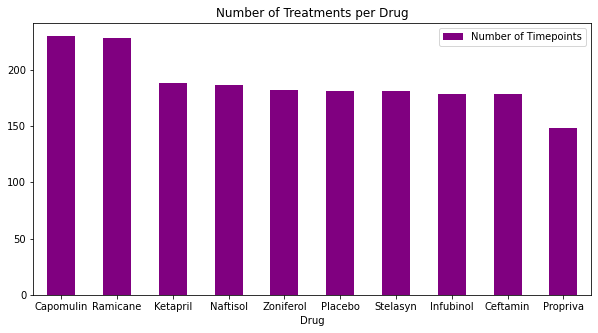

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html
grpsumm2 = grp1_summ.plot.bar(x="Drug", y="Number of Timepoints", title= "Number of Treatments per Drug", figsize=(10,5), color='purple', rot=0)
grpsumm2

In [17]:
mr_clean["Sex"].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

In [18]:
len(mr_clean.loc[mr_clean['Sex'] == 'Male'])

958

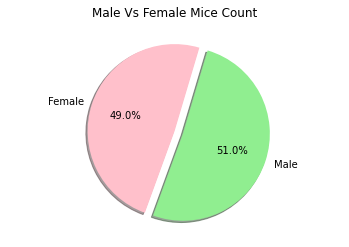

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male = len(mr_clean.loc[mr_clean['Sex'] == 'Male'])
female = len(mr_clean.loc[mr_clean['Sex'] == 'Female'])
sizes = [male, female]
piesumm = mr_clean['Sex'].value_counts()
labels = ['Male', 'Female']
colors = ['lightgreen', 'pink']
explode = (0.1, 0)

plt.title("Male Vs Female Mice Count")
plt.axis("equal")

plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=250)

plt.show()

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_summ = pd.DataFrame
pie_summ = mr_clean["Sex"].value_counts().reset_index()
pie_summ.columns = ["Sex", "Count"]


pie_summ


,Sex,Count
0,Male,958
1,Female,922


<AxesSubplot:title={'center':'Male Vs Female Mice Count'}, ylabel='Count'>

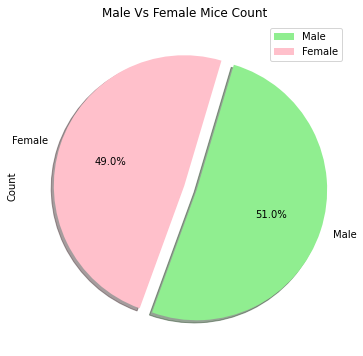

In [21]:
plow = pie_summ.plot.pie(y='Count', title='Male Vs Female Mice Count', labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=250, figsize=(10,6))
plow

## Quartiles, Outliers and Boxplots

In [22]:
# group by mouse id and get timepoint and max
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


times = mr_clean.groupby("Mouse ID").Timepoint.max().reset_index()
times

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [23]:
timesumm = pd.merge(mr_clean, times, on=["Mouse ID", "Timepoint"], how="inner")
timesumm.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [24]:
cond2 = timesumm["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
timesumm1 = timesumm.loc[cond2].reset_index(drop=True)
timesumm1.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



In [26]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

data = []

for drug in drugs:
    sub = timesumm1.loc[timesumm1["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    lower_q = sub.quantile(0.25)
    upper_q = sub.quantile(0.75)
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5*iqr
    upper_bound = upper_q + 1.5*iqr
    
    mask = (timesumm1["Drug Regimen"] == drug) & ((timesumm1["Tumor Volume (mm3)"] > upper_bound) | (timesumm1["Tumor Volume (mm3)"] < lower_bound))
    outliers = timesumm1.loc[mask]
    print(outliers)
    
    data.append(sub)

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
58     c326    Infubinol  Female          18          25          5   

    Tumor Volume (mm3)  Metastatic Sites  
58           36.321346                 0  
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


In [27]:
timesumm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            100 non-null    object 
 1   Drug Regimen        100 non-null    object 
 2   Sex                 100 non-null    object 
 3   Age_months          100 non-null    int64  
 4   Weight (g)          100 non-null    int64  
 5   Timepoint           100 non-null    int64  
 6   Tumor Volume (mm3)  100 non-null    float64
 7   Metastatic Sites    100 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 6.4+ KB


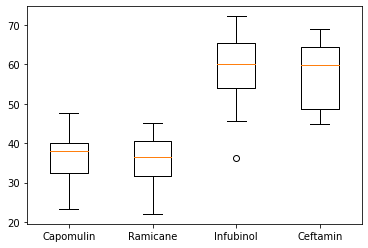

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(data, labels=drugs)
plt.show()

## Line and Scatter Plots

In [29]:
mask2 = mr_clean['Drug Regimen'] == 'Capomulin'
cap = mr_clean.loc[mask2].groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean().reset_index()

cap

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22
5,i557,44.805810,24
6,i738,39.141053,20
7,j119,44.465236,23
8,j246,43.216925,21
9,l509,44.434474,21


In [30]:
mr_clean["Mouse ID"].value_counts()

k862    10
h246    10
c757    10
a203    10
k894    10
        ..
b447     1
h428     1
d133     1
v199     1
f932     1
Name: Mouse ID, Length: 248, dtype: int64

In [31]:

cond4 = mr_clean["Mouse ID"] == 's185'
s185 = mr_clean.loc[cond4]
s185_2 = pd.DataFrame
s185_2= s185.groupby("Timepoint")["Tumor Volume (mm3)"].unique().reset_index()
s185_2

,Timepoint,Tumor Volume (mm3)
0,0,[45.0]
1,5,[43.87849569]
2,10,[37.61494768]
3,15,[38.17723195]
4,20,[36.86687576]
5,25,[33.94994037]
6,30,[32.95967078]
7,35,[28.32853059]
8,40,[25.47214326]
9,45,[23.34359787]


In [32]:
s185_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Timepoint           10 non-null     int64 
 1   Tumor Volume (mm3)  10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [33]:
# https://towardsdatascience.com/change-column-data-type-in-pandas-954d7acdef1d
s185_2 = s185_2.astype('int64', errors='ignore')
s185_2.head()
s185_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Timepoint           10 non-null     int64
 1   Tumor Volume (mm3)  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


<AxesSubplot:title={'center':'Tumor Volume Vs Elapsed Treatment Time'}, xlabel='Timepoint'>

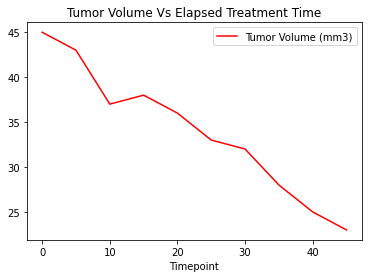

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df_185 = s185_2.plot.line(x="Timepoint", y=("Tumor Volume (mm3)"), title="Tumor Volume Vs Elapsed Treatment Time", color='red')
df_185


<function matplotlib.pyplot.show(close=None, block=None)>

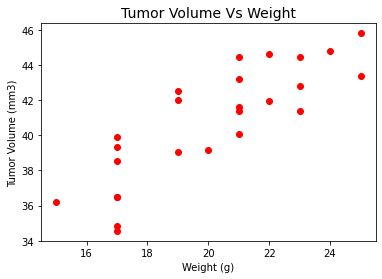

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(cap['Weight (g)'], cap["Tumor Volume (mm3)"], color="red")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Tumor Volume Vs Weight", fontsize=14)
plt.show

## Correlation and Regression

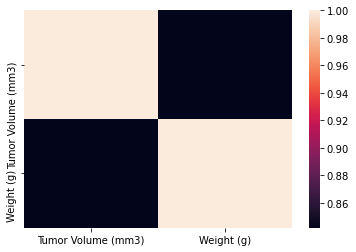

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corrs = cap.corr()
sns.heatmap(corrs)
plt.show()

In [37]:
corrs

,Tumor Volume (mm3),Weight (g)
Tumor Volume (mm3),1.000000,0.841936
Weight (g),0.841936,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

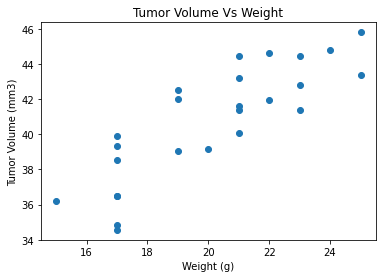

In [38]:
plt.scatter(cap['Weight (g)'], cap["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Tumor Volume Vs Weight")
plt.show

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap['Weight (g)'], cap["Tumor Volume (mm3)"])

In [40]:
linregress(cap['Weight (g)'], cap["Tumor Volume (mm3)"])

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134, intercept_stderr=2.590987686768349)

In [41]:
pred = cap['Weight (g)'] * slope + intercept

pred

0     42.549834
1     41.595394
2     37.777635
3     39.686515
4     42.549834
5     44.458713
6     40.640954
7     43.504273
8     41.595394
9     41.595394
10    39.686515
11    37.777635
12    39.686515
13    45.413153
14    37.777635
15    45.413153
16    37.777635
17    43.504273
18    37.777635
19    37.777635
20    41.595394
21    43.504273
22    41.595394
23    35.868756
24    37.777635
Name: Weight (g), dtype: float64

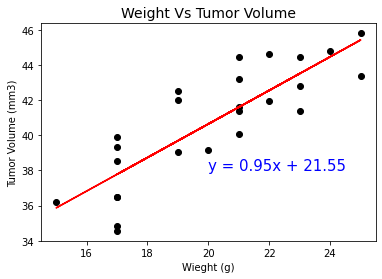

In [42]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap['Weight (g)'], cap["Tumor Volume (mm3)"], color = "black")
plt.plot(cap['Weight (g)'],pred,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="blue")
plt.xlabel('Wieght (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Weight Vs Tumor Volume", fontsize=14)
plt.show()